<a href="https://colab.research.google.com/github/ThilankaPerera/week05/blob/main/demo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

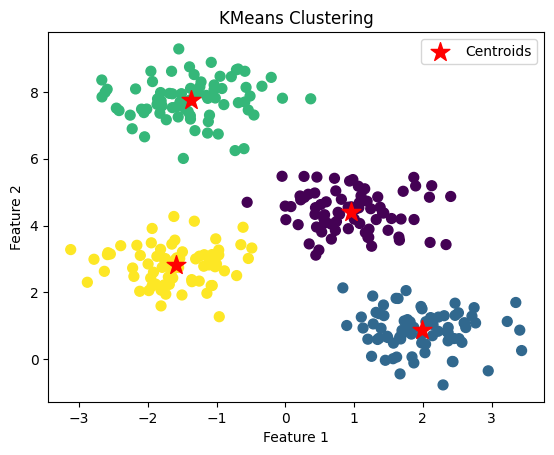

In [ ]:
# prompt: unsupervised python example

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [ ]:
# prompt: generate anomaly detection with python

import numpy as np
from sklearn.ensemble import IsolationForest

def anomaly_detection(data, contamination=0.1):
  """
  Performs anomaly detection on the given data using Isolation Forest.

  Args:
    data: A NumPy array or a list of lists representing the data points.
    contamination: The proportion of outliers in the data set.

  Returns:
    A NumPy array containing the anomaly scores for each data point.
    Anomaly scores < 0 indicate anomalies.
  """

  # Convert data to a NumPy array if it's not already.
  if not isinstance(data, np.ndarray):
      data = np.array(data)

  # Create an Isolation Forest model.
  model = IsolationForest(contamination=contamination, random_state=42)

  # Fit the model to the data.
  model.fit(data)

  # Get the anomaly scores for each data point.
  anomaly_scores = model.decision_function(data)

  return anomaly_scores


# Example usage
# Sample data (replace with your actual data)
data = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])

# Perform anomaly detection
anomaly_scores = anomaly_detection(data)

# Print the anomaly scores
print("Anomaly Scores:", anomaly_scores)

# Identify anomalies (scores < 0)
anomalies = np.where(anomaly_scores < 0)
print("\nAnomalies detected at indices:", anomalies[0])

Anomaly Scores: [ 0.09711818  0.06434601  0.04627454  0.0657635   0.03276356 -0.03276356]

Anomalies detected at indices: [5]


In [ ]:
import pandas as pd

# Creating a sample HR dataset
data = {
    "satisfaction_level": [0.45, 0.78, 0.89, 0.56, 0.34, 0.77, 0.91, 0.68, 0.45, 0.80],
    "last_evaluation": [0.50, 0.80, 0.92, 0.60, 0.30, 0.85, 0.95, 0.72, 0.55, 0.88]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving to CSV
csv_filename = "hr_data.csv"
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' has been generated.")


CSV file 'hr_data.csv' has been generated.


Model Accuracy: 0.85


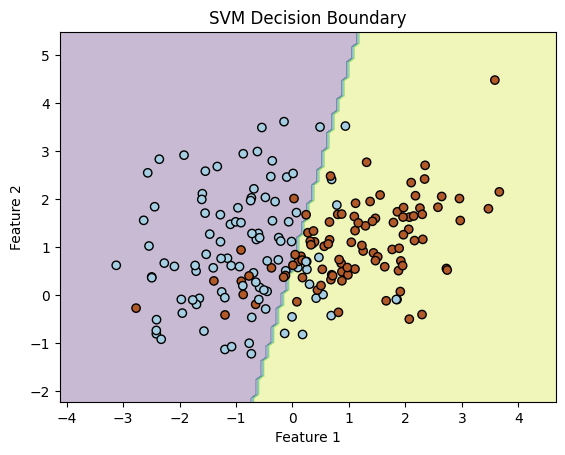

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Visualizing decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_model, X, y)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load HR dataset from CSV file
csv_file = "updated_hr_data.csv"
df = pd.read_csv(csv_file)

# Selecting features and target variable (assuming 'attrition' is the target column)
X = df[['satisfaction_level', 'last_evaluation']].values
y = df['attrition'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVC model
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))



Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
# Function to predict attrition result
def predict_attrition(satisfaction_level, last_evaluation):
    input_data = scaler.transform([[satisfaction_level, last_evaluation]])
    prediction = svc.predict(input_data)
    return "Likely to leave" if prediction[0] == 1 else "Likely to stay"

# Example usage
satisfaction = 0.6
last_evaluation = 0.8
result = predict_attrition(satisfaction, last_evaluation)
print(f'Predicted attrition result: {result}')



Predicted attrition result: Likely to leave


In [ ]:
import pandas as pd

# Creating an updated HR dataset with 'attrition' column
data = {
    "satisfaction_level": [0.45, 0.78, 0.89, 0.56, 0.34, 0.77, 0.91, 0.68, 0.45, 0.80],
    "last_evaluation": [0.50, 0.80, 0.92, 0.60, 0.30, 0.85, 0.95, 0.72, 0.55, 0.88],
    "attrition": [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]  # 1 = Left, 0 = Stayed
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving to CSV
csv_filename = "updated_hr_data.csv"
df.to_csv(csv_filename, index=False)

print(f"Updated CSV file '{csv_filename}' has been generated.")


Updated CSV file 'updated_hr_data.csv' has been generated.


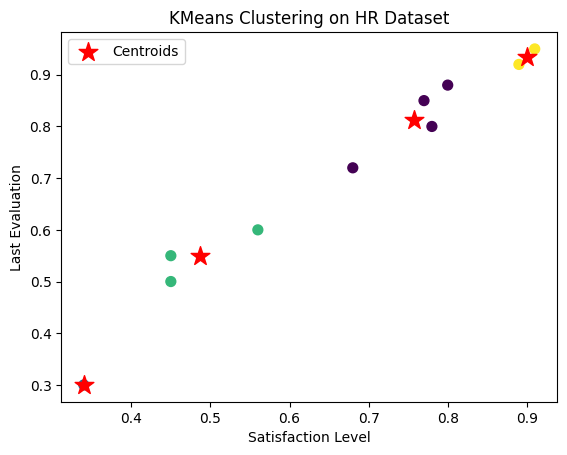

   satisfaction_level  last_evaluation  Cluster
0                0.45             0.50        2
1                0.78             0.80        0
2                0.89             0.92        3
3                0.56             0.60        2
4                0.34             0.30        1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load HR dataset from CSV file
csv_file = "hr_data.csv"  # Change this to your HR dataset file path
df = pd.read_csv(csv_file)

# Selecting relevant numerical columns for clustering (e.g., 'satisfaction_level' and 'last_evaluation')
X = df[['satisfaction_level', 'last_evaluation']].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('KMeans Clustering on HR Dataset')
plt.legend()
plt.show()

df['Cluster'] = labels  # Add cluster labels to the dataset
print(df.head())  # Show the first few rows
